In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
def pad_images(image, filter_size):
    p = int((filter_size - 1)/2)
    image = np.pad(array=image, pad_width=p, mode='constant', constant_values=0)
    return image

def create_dataset(gray, red, green, blue, f_s):
    X = []
    y = []
    p_gray = pad_images(gray, f_s)
    p_red = pad_images(red, f_s)
    p_green = pad_images(green, f_s)
    p_blue = pad_images(blue, f_s)
    
    for i in range(0, len(p_gray)-(f_s-1)):
        for j in range(0, len(p_gray)-(f_s-1)):
            X.append(list(p_gray[i:i+f_s,j:j+f_s].flatten()))
            y.append([p_red[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)], 
                      p_green[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)], 
                      p_blue[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)]])
    
    return X, y
    
def get_images(directory, f_s):
    exts = ["jpg", "jpeg", "png"]
    print("Opening directory {}".format(directory))
    for root, dirs, files in os.walk(directory):
        if root:
            X = []
            y = []
            file_name = []
            for f in files:
                if f.split(".")[1] in exts:
                    print("Accessging ", f)
                    image = cv2.imread(os.path.join(root, f))
                    image = cv2.resize(image, (200,200), interpolation = cv2.INTER_AREA)
                    # gray image
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # red, green, blue components
                    red, green, blue = image[:,:,2], image[:,:,1], image[:,:,0]
                    m_X, m_y = create_dataset(gray, red, green, blue, f_s)
                
                    X.append(m_X)
                    y.append(m_y)
                    file_name.append(f)
    return X, y, file_name
                
def align_data(X, y):
    data_X = []
    for sublist in X:
        for item in sublist:
            data_X.append(item)

    data_y_red = []
    data_y_green = []
    data_y_blue = []

    for sublist in y:
        for item in sublist:
            data_y_red.append(item[0])
            data_y_green.append(item[1])
            data_y_blue.append(item[2])
            
    return data_X, data_y_red, data_y_green, data_y_blue

In [44]:
directory = "./ImagesRed/"
filter_size = 11
X, y, files = get_images(directory, filter_size)
data_X, data_y_red, data_y_green, data_y_blue = align_data(X, y)

Opening directory ./ImagesRed/
Accessging  3.jpg
Accessging  7.jpg
Accessging  4.jpeg
Accessging  2.jpg
Accessging  5.jpg
Accessging  6.jpg
Accessging  1.jpg


In [45]:
# Model for red
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(data_X, data_y_red, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_r)

X_train_r = scaler.transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

mlp_r = MLPRegressor(hidden_layer_sizes=(10, 20, 10),  activation='logistic', 
                   solver='sgd', max_iter=2000, alpha=0.001, batch_size=100, verbose=True)
mlp_r.fit(X_train_r,y_train_r)

Iteration 1, loss = 3691.82592481
Iteration 2, loss = 2779.58781671
Iteration 3, loss = 1698.69039502
Iteration 4, loss = 1585.80549862
Iteration 5, loss = 1604.82358176
Iteration 6, loss = 1489.39252930
Iteration 7, loss = 1253.50493171
Iteration 8, loss = 1266.51008758
Iteration 9, loss = 814.53759107
Iteration 10, loss = 626.11730797
Iteration 11, loss = 746.43241750
Iteration 12, loss = 1718.96596050
Iteration 13, loss = 1659.18783714
Iteration 14, loss = 1391.44841863
Iteration 15, loss = 1681.29247537
Iteration 16, loss = 1467.24589812
Iteration 17, loss = 1642.08317057
Iteration 18, loss = 1672.49018640
Iteration 19, loss = 1545.39624248
Iteration 20, loss = 1413.05432644
Iteration 21, loss = 1728.49637887
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='logistic', alpha=0.001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [46]:
predictions_r = mlp_r.predict(X_test_r)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


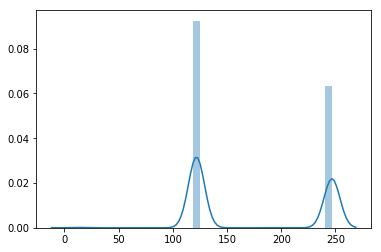

In [47]:
sns.distplot(predictions_r)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


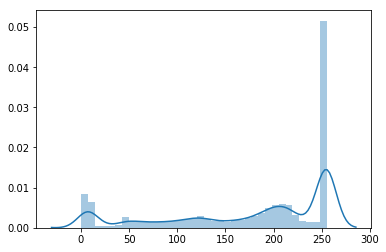

In [48]:
sns.distplot(y_test_r)

In [49]:
# Model for green
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(data_X, data_y_green, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_g)

X_train_g = scaler.transform(X_train_g)
X_test_g = scaler.transform(X_test_g)

mlp_g = MLPRegressor(hidden_layer_sizes=(10,20,10),  activation='logistic', 
                   solver='sgd', max_iter=2000, alpha=0.001, batch_size=100, verbose=True)
mlp_g.fit(X_train_g,y_train_g)

Iteration 1, loss = 963.60033898
Iteration 2, loss = 81.15881685
Iteration 3, loss = 78.03330937
Iteration 4, loss = 181.39297601
Iteration 5, loss = 117.16664471
Iteration 6, loss = 97.05942594
Iteration 7, loss = 90.22979472
Iteration 8, loss = 82.59204101
Iteration 9, loss = 84.40755839
Iteration 10, loss = 93.82915268
Iteration 11, loss = 81.07477937
Iteration 12, loss = 91.73369957
Iteration 13, loss = 144.38927724
Iteration 14, loss = 84.84442485
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='logistic', alpha=0.001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [50]:
predictions_g = mlp_g.predict(X_test_g)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


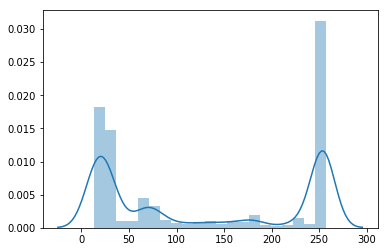

In [51]:
sns.distplot(predictions_g)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


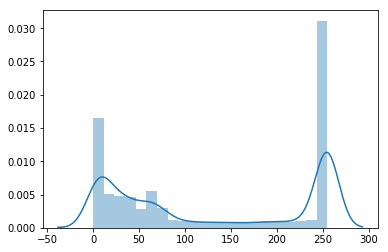

In [52]:
sns.distplot(y_test_g)

In [53]:
# Model for blue
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_X, data_y_blue, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_b)

X_train_b = scaler.transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

mlp_b = MLPRegressor(hidden_layer_sizes=(10,20,10),  activation='logistic', 
                   solver='sgd', max_iter=2000, alpha=0.003, batch_size=100, verbose=True)
mlp_b.fit(X_train_b,y_train_b)

Iteration 1, loss = 2533.63311917
Iteration 2, loss = 235.84820823
Iteration 3, loss = 181.59704498
Iteration 4, loss = 127.33114899
Iteration 5, loss = 297.78667445
Iteration 6, loss = 195.81566514
Iteration 7, loss = 97.13054638
Iteration 8, loss = 85.42390556
Iteration 9, loss = 79.05257735
Iteration 10, loss = 74.98150973
Iteration 11, loss = 72.69778332
Iteration 12, loss = 105.02353828
Iteration 13, loss = 139.05152899
Iteration 14, loss = 300.89122943
Iteration 15, loss = 189.17397791
Iteration 16, loss = 123.60182275
Iteration 17, loss = 116.76864340
Iteration 18, loss = 114.76461996
Iteration 19, loss = 107.38478400
Iteration 20, loss = 96.97063844
Iteration 21, loss = 88.55950364
Iteration 22, loss = 86.44617346
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='logistic', alpha=0.003, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [54]:
predictions_b = mlp_b.predict(X_test_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


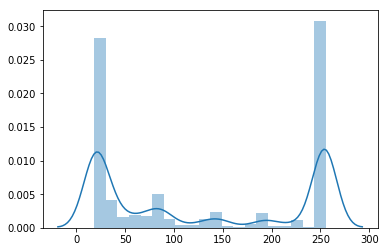

In [55]:
sns.distplot(predictions_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


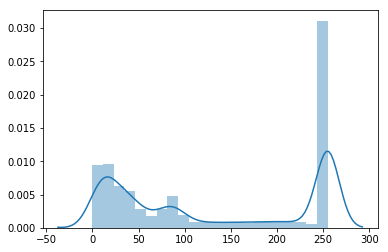

In [56]:
sns.distplot(y_test_b)

In [57]:
def bound_predictions(predictions_b, predictions_g, predictions_r):
    for i in range(len(predictions_g)):
        if predictions_b[i] < 0:
            predictions_b[i] = 0
        if predictions_b[i] > 255:
            predictions_b[i] = 255
        if predictions_g[i] < 0:
            predictions_g[i] = 0
        if predictions_g[i] > 255:
            predictions_g[i] = 255
        if predictions_r[i] < 0:
            predictions_r[i] = 0
        if predictions_r[i] > 255:
            predictions_r[i] = 255
    
        predictions_b[i] = int(predictions_b[i])
        predictions_g[i] = int(predictions_g[i])
        predictions_r[i] = int(predictions_r[i])
        
    return predictions_r, predictions_g, predictions_b

In [58]:
directory = "./ImagesRed/test"
filter_size = 11
X, y, files = get_images(directory, filter_size)
print(files)
data_X_test, data_y_red_test, data_y_green_test, data_y_blue_test = align_data(X, y)
data_X_test = scaler.transform(data_X_test)

Opening directory ./ImagesRed/test
Accessging  simple.jpg
['simple.jpg']


In [65]:
test_predictions_b = mlp_b.predict(data_X_test)
test_predictions_g = mlp_g.predict(data_X_test)
test_predictions_r = mlp_r.predict(data_X_test)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


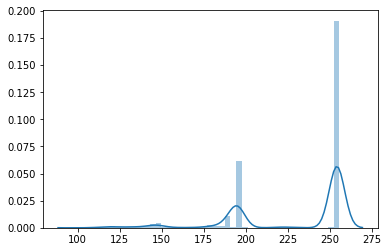

In [66]:
sns.distplot(test_predictions_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


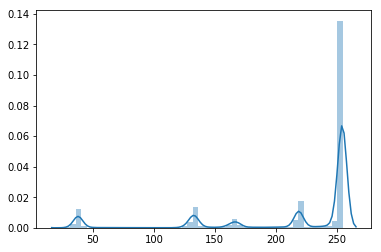

In [67]:
sns.distplot(data_y_blue_test)

In [68]:
test_predictions_b, test_predictions_g, test_predictions_r = bound_predictions(test_predictions_b, test_predictions_g, test_predictions_r)

In [69]:
test_predictions_b

array([121., 121., 121., ..., 121., 121., 121.])

In [70]:
from PIL import Image

In [72]:
class Colorizer():
    def __init__(self, red_list, blue_list, green_list, image_location='./ImagesRed/test/simple.jpg'):
        self.im_size = (0, 0)
        self.image_loc = image_location
        self.image = None
        self.pix_object = None
        self.pixel_values = None
        self.red = red_list
        self.blue = blue_list
        self.green = green_list
        
    def extract_pixels(self):
        # Open the image
        self.image = Image.open(self.image_loc)
        # Load the image - Pixel object
        self.pix_object = self.image.load()
        # Size of the image - Number of rows * Number of columns
        self.im_size = self.image.size
        # Extract all the pixel values - Start from left corner (Moving from Left to Right)
        self.pixel_values = list(self.image.getdata())
        
    def create_image_from_array(self):
        
        w, h = 200, 200
        count = 0
        data = np.zeros((h, w, 3), dtype=np.uint8)
        
        for i in range(w):
            
            for j in range(h):
                
                data[i,j] = (int(self.red[count]), int(self.green[count]), int(self.blue[count]))
                count +=1
        
        img = Image.fromarray(data, 'RGB')
        img.save('sgd_sigmoid_100_simple_red.png')
        img.show()

In [73]:
new_color = Colorizer(red_list=test_predictions_r, blue_list=test_predictions_b, green_list=test_predictions_g)
new_color.extract_pixels()
new_color.create_image_from_array()
print("Done")

Done
